# ShadowFox
## Data Science INTERNSHIP
## Name: Pavithiran.V
### Task 2 Task Level (Intermediate)

1. Conduct an in-depth analysis of the Air Quality Index (AQI) in Delhi, addressing the specific environmental challenges faced by the city. Define research questions centered around key pollutants, seasonal variations, and the impact of geographical factors on air quality. Utilize statistical analyses and visualizations to gain insights into the dynamics of AQI in Delhi, offering a comprehensive understanding that can inform targeted strategies for air quality improvement and public health initiatives in the region.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
file_path = '/kaggle/input/delhiaqi-dataset-1/delhiaqi.csv'
df = pd.read_csv(file_path)

In [32]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


## Pre-Processing

### Check for Missing Values

In [34]:
missing_values = df.isnull().sum()
print(missing_values)

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


since there is no missing value.There is no need for missing value handling

In [35]:
df.dtypes

date      object
co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object

Since, The date is in object. lets convert it to date data type

### Convert date column to datetime

In [36]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
dtype: object

In [37]:
breakpoints_pm25 = [
    (0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150),
    (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)
]
breakpoints_pm10 = [
    (0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150),
    (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)
]

# Function to calculate AQI for a given pollutant concentration using breakpoints
def calculate_individual_aqi(Cp, breakpoints):
    for i in range(len(breakpoints)):
        Clow, Chigh, Ilow, Ihigh = breakpoints[i]
        if Clow <= Cp <= Chigh:
            return ((Ihigh - Ilow) / (Chigh - Clow)) * (Cp - Clow) + Ilow
    return np.nan

# Check and calculate AQI for PM2.5 and PM10
if 'pm2_5' in df.columns:
    df['AQI_PM2.5'] = df['pm2_5'].apply(lambda x: calculate_individual_aqi(x, breakpoints_pm25))
else:
    print("PM2.5 column not found")

if 'pm10' in df.columns:
    df['AQI_PM10'] = df['pm10'].apply(lambda x: calculate_individual_aqi(x, breakpoints_pm10))
else:
    print("PM10 column not found")

# Debugging: print AQI columns to ensure values are calculated
print(df[['pm2_5', 'AQI_PM2.5', 'pm10', 'AQI_PM10']].head())

# Find the maximum AQI for each row to get the overall AQI
aqi_columns = [col for col in df.columns if col.startswith('AQI_')]
df['AQI'] = df[aqi_columns].max(axis=1)

# Display the dataframe with the new AQI columns
print(df.head())


# Save the dataframe to a new CSV file
output_file_path = 'delhiaqi_with_aqi.csv'
df.to_csv(output_file_path, index=False)

# Confirm that the file has been saved
print(f"The file has been saved to {output_file_path}")

    pm2_5   AQI_PM2.5    pm10    AQI_PM10
0  169.29  219.620721  194.64  120.619798
1  182.84  233.048649  211.08  128.756768
2  220.25  270.121622  260.68  153.811313
3  252.90  303.378378  304.12  175.311919
4  266.36  316.717117  322.80  184.557576
                 date       co     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3   AQI_PM2.5    AQI_PM10         AQI  
0   5.83  219.620721  120.619798  219.620721  
1   7.66  233.048649  128.756768  233.048649  
2  11.40  270.121622  153.811313  270.121622  
3  13.55  303.378378  175.311919  303.378378  
4  14.19  316.717117  184.557576  316.717117  
The

## Exploratory Data Analysis

let's Explore the Data.

In [38]:
df.describe()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI_PM2.5,AQI_PM10,AQI
count,561,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,458.000000,455.000000,461.000000
mean,2023-01-12 16:00:00,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062,315.555660,203.387834,316.723695
min,2023-01-01 00:00:00,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000,153.375132,57.968889,153.375132
25%,2023-01-06 20:00:00,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000,235.863063,133.052929,235.863063
50%,2023-01-12 16:00:00,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000,319.397748,176.776970,320.809910
75%,2023-01-18 12:00:00,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000,384.272973,238.842391,384.600000
max,2023-01-24 08:00:00,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000,498.177185,499.980000,499.980000
std,NaN,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094,88.662644,97.265638,89.539924


### Distribution plot for AQI

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


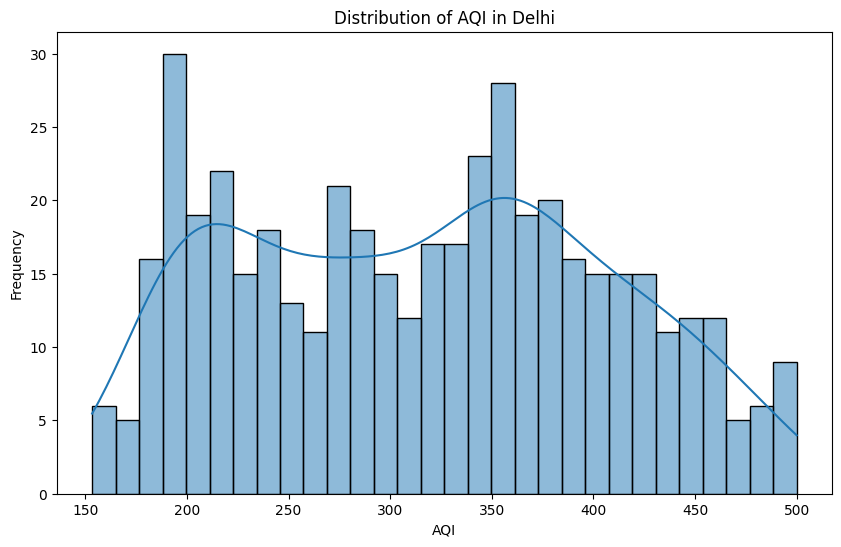

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI in Delhi')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

In [40]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI_PM2.5,AQI_PM10,AQI
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,219.620721,120.619798,219.620721
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,233.048649,128.756768,233.048649
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,270.121622,153.811313,270.121622
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,303.378378,175.311919,303.378378
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,316.717117,184.557576,316.717117


### Analyze how AQI varies with month

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


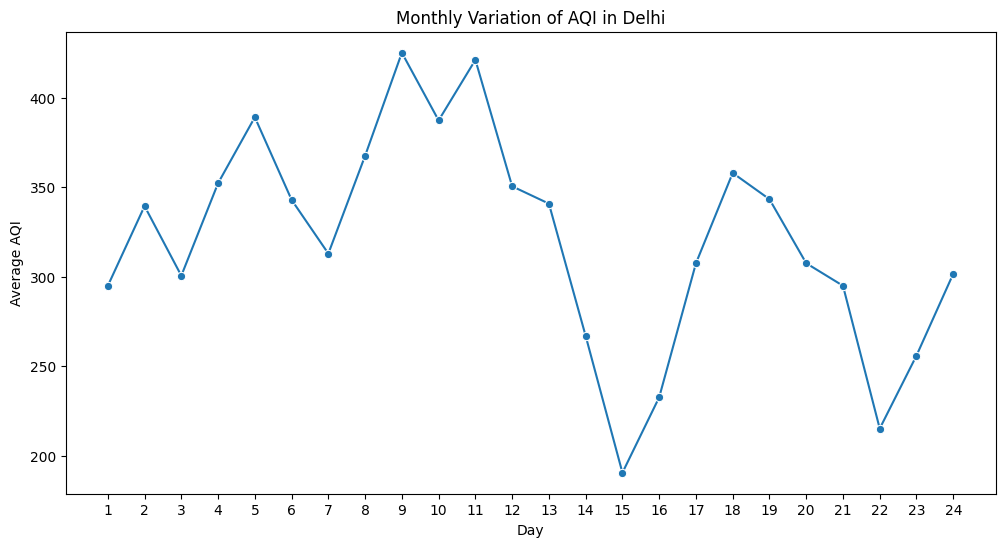

In [41]:
# Extract month and year from the date
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month

# Group by month and calculate mean AQI
Day_aqi = df.groupby('Day')['AQI'].mean().reset_index()

# Plot seasonal variations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='AQI', data=Day_aqi, marker='o')
plt.title('Monthly Variation of AQI in Delhi')
plt.xlabel('Day')
plt.ylabel('Average AQI')
plt.xticks(range(1, 25))
plt.show()

### Analyze AQI trends over Time.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


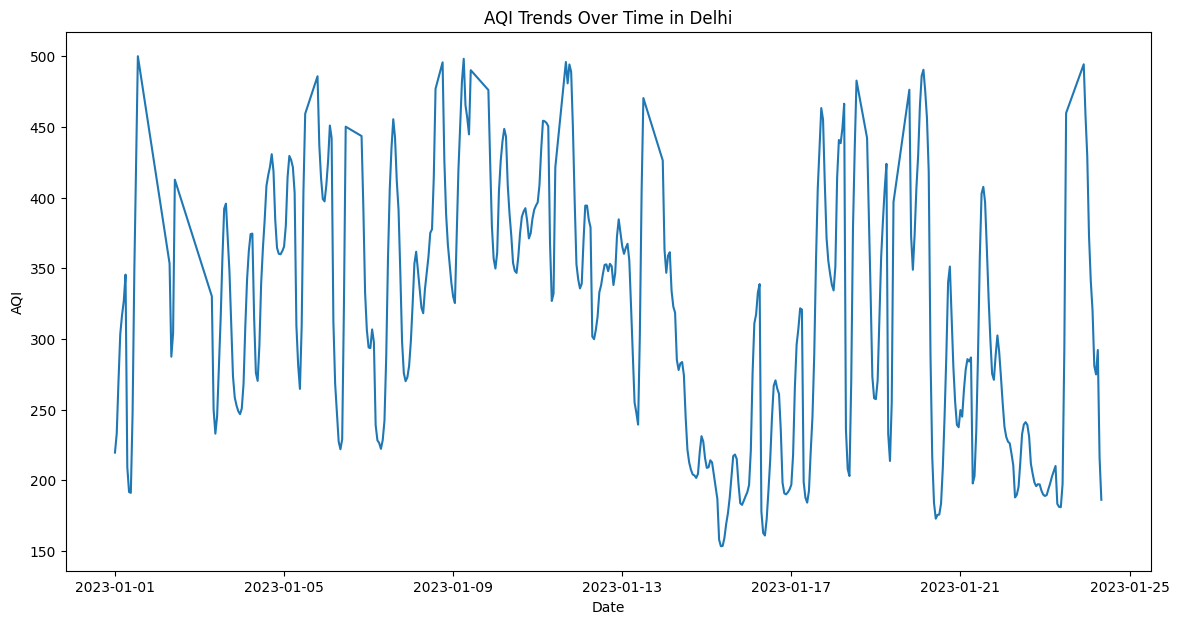

In [42]:
# Time series plot for AQI
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='AQI', data=df)
plt.title('AQI Trends Over Time in Delhi')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

### Correlation Analysis

Let's see the Correlation of the feature using Correlation matrix.

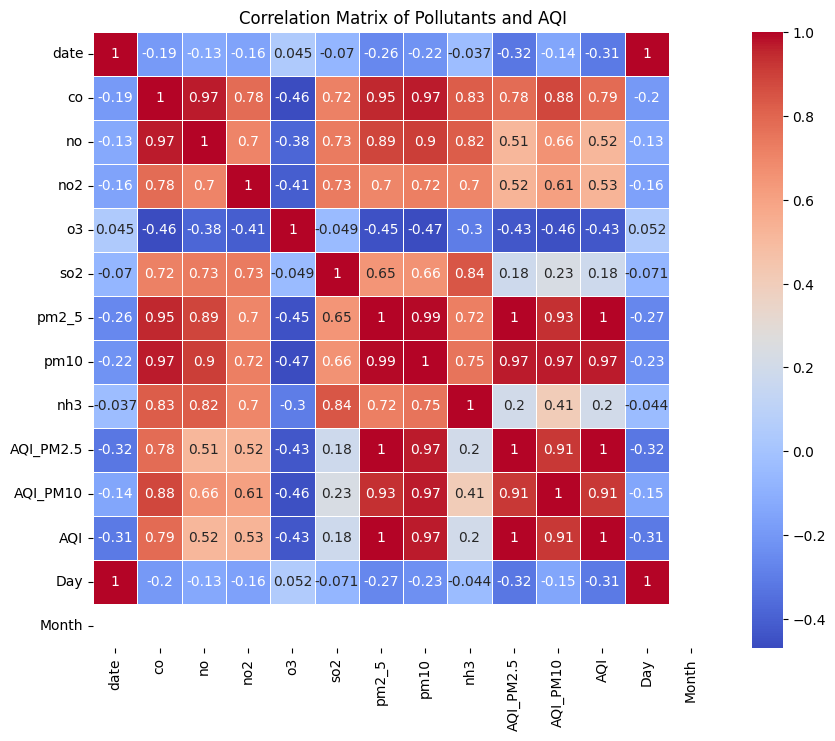

In [43]:
# Calculate correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Pollutants and AQI')
plt.show()

In [44]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI_PM2.5,AQI_PM10,AQI,Day,Month
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,219.620721,120.619798,219.620721,1,1
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,233.048649,128.756768,233.048649,1,1
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,270.121622,153.811313,270.121622,1,1
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,303.378378,175.311919,303.378378,1,1
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,316.717117,184.557576,316.717117,1,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

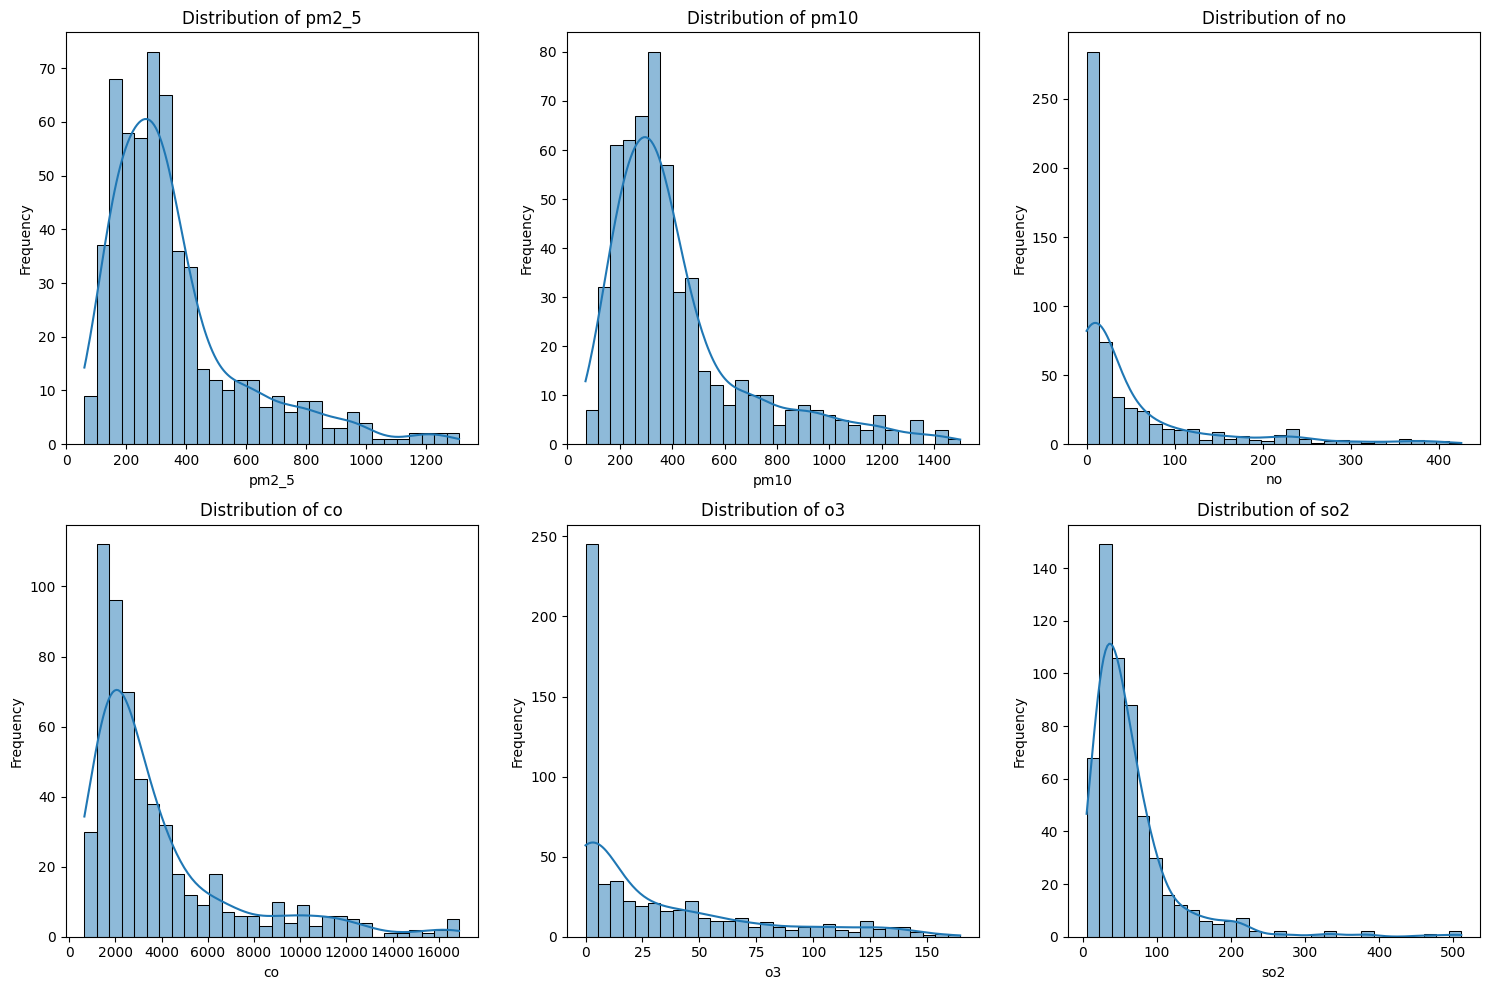

In [45]:
pollutants = ['pm2_5', 'pm10', 'no', 'co', 'o3', 'so2']
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[pollutant], bins=30, kde=True)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

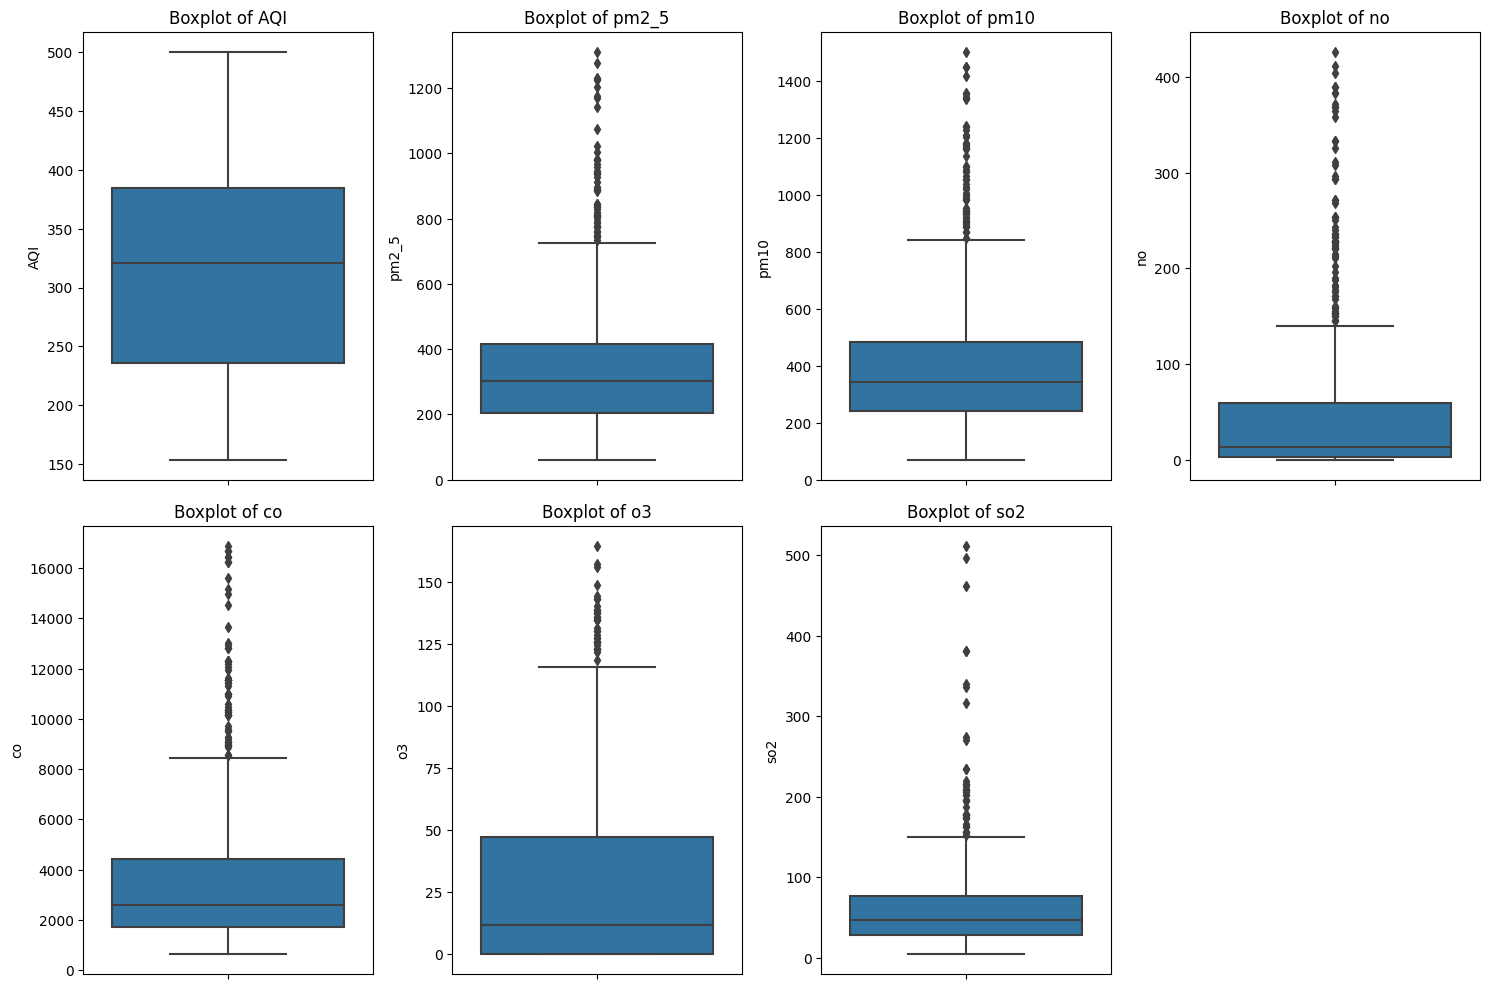

In [46]:
# Boxplots for AQI and pollutants
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(['AQI'] + pollutants, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[pollutant])
    plt.title(f'Boxplot of {pollutant}')
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

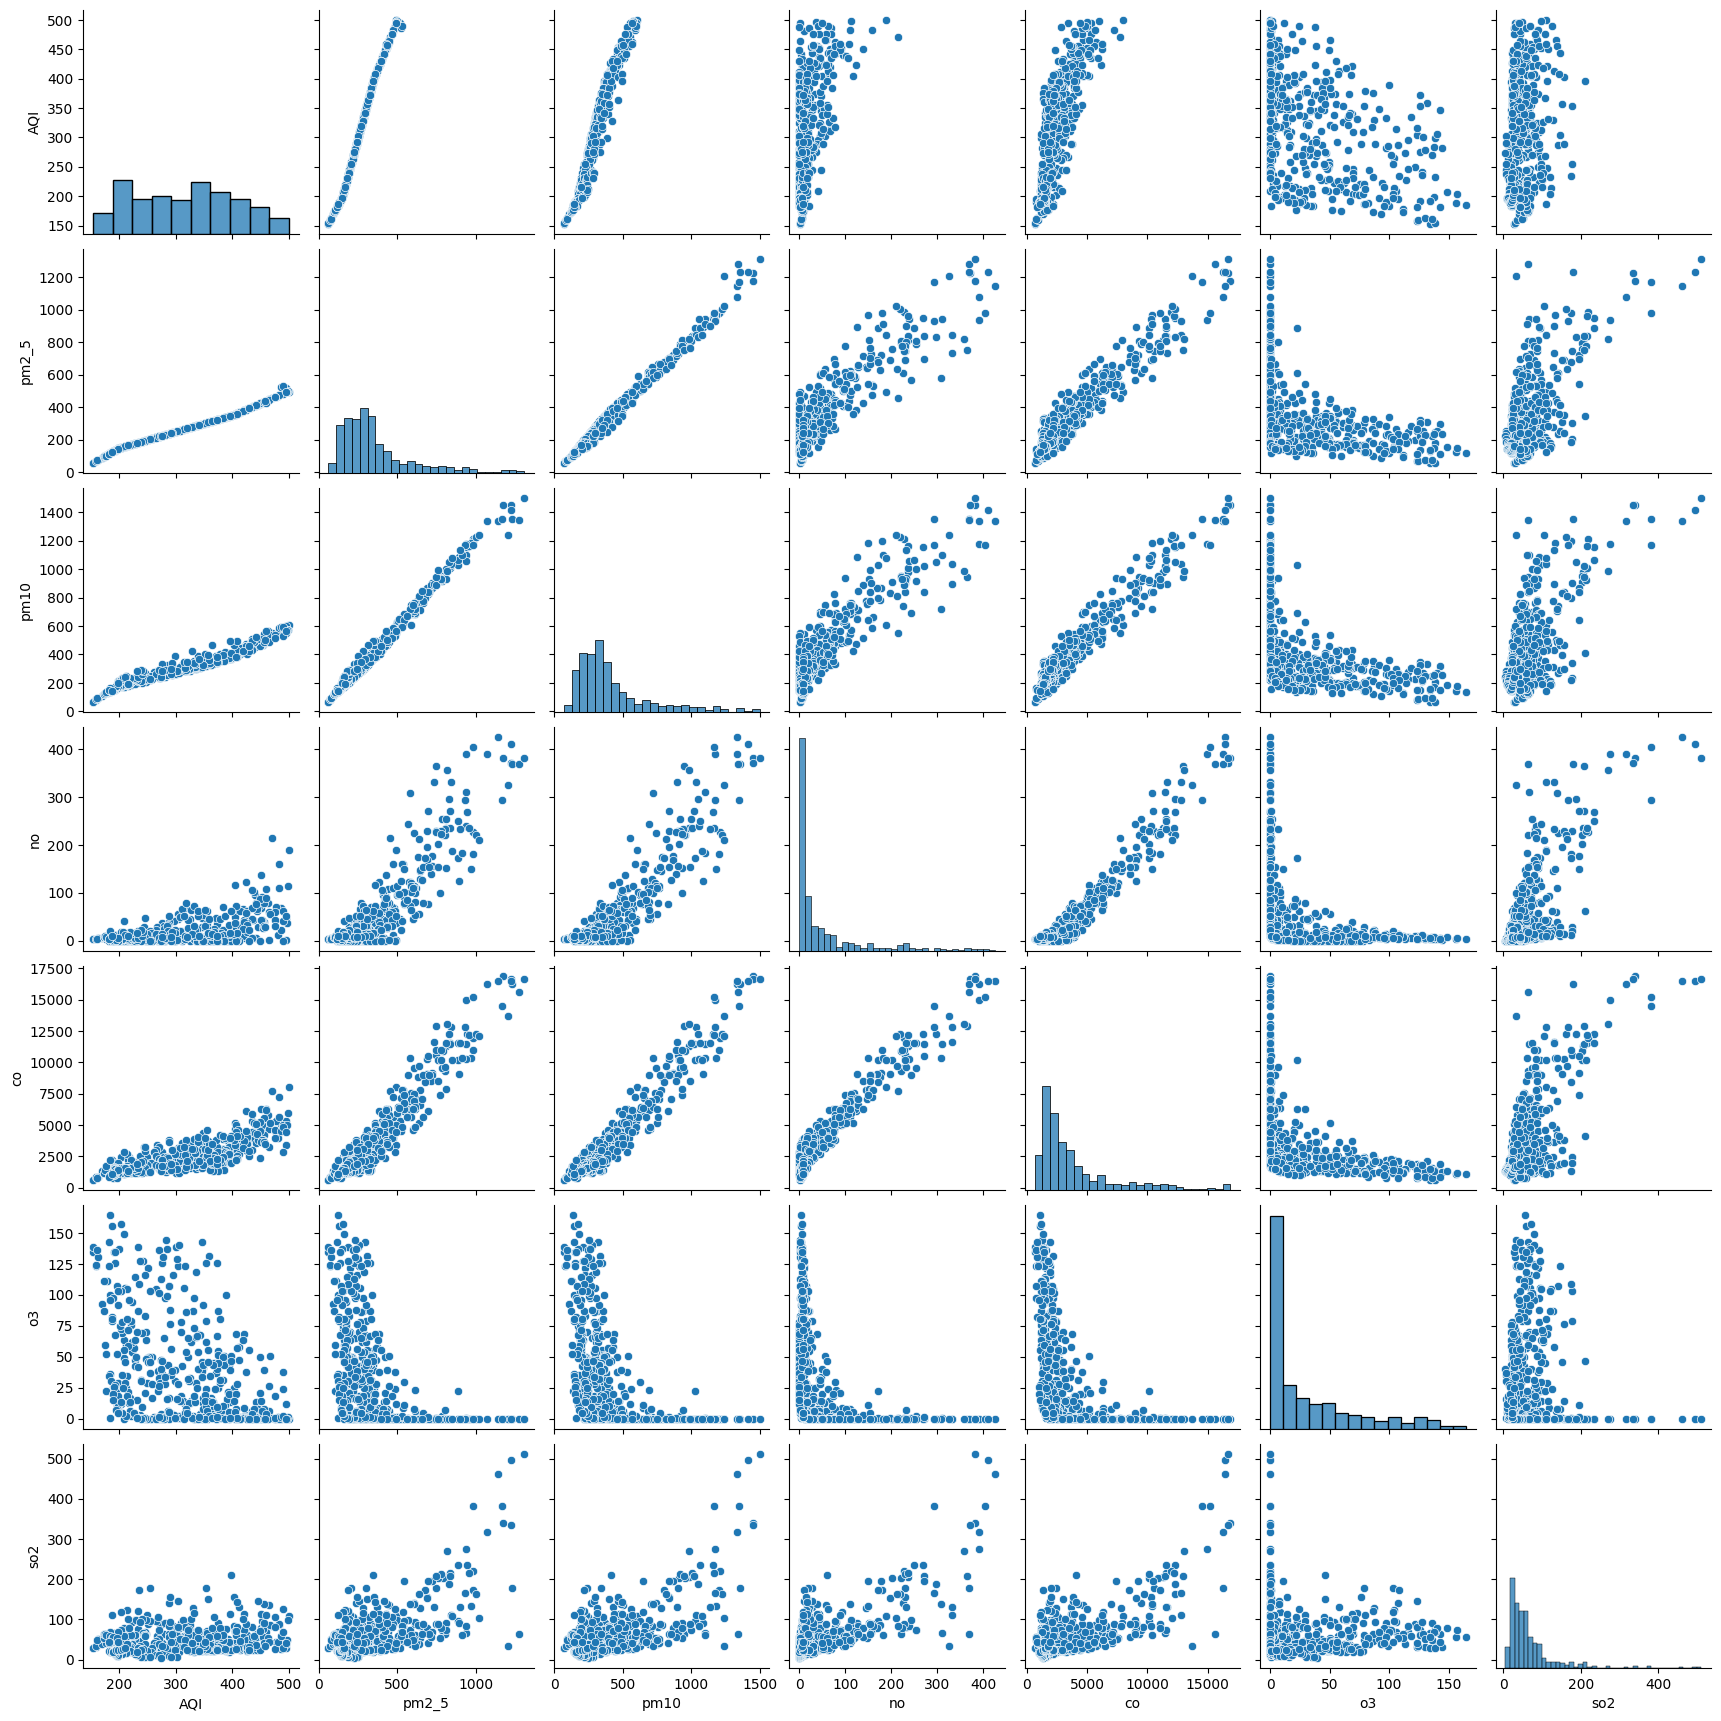

In [47]:
# Pairplots for pollutants and AQI
sns.pairplot(df[['AQI'] + pollutants])
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


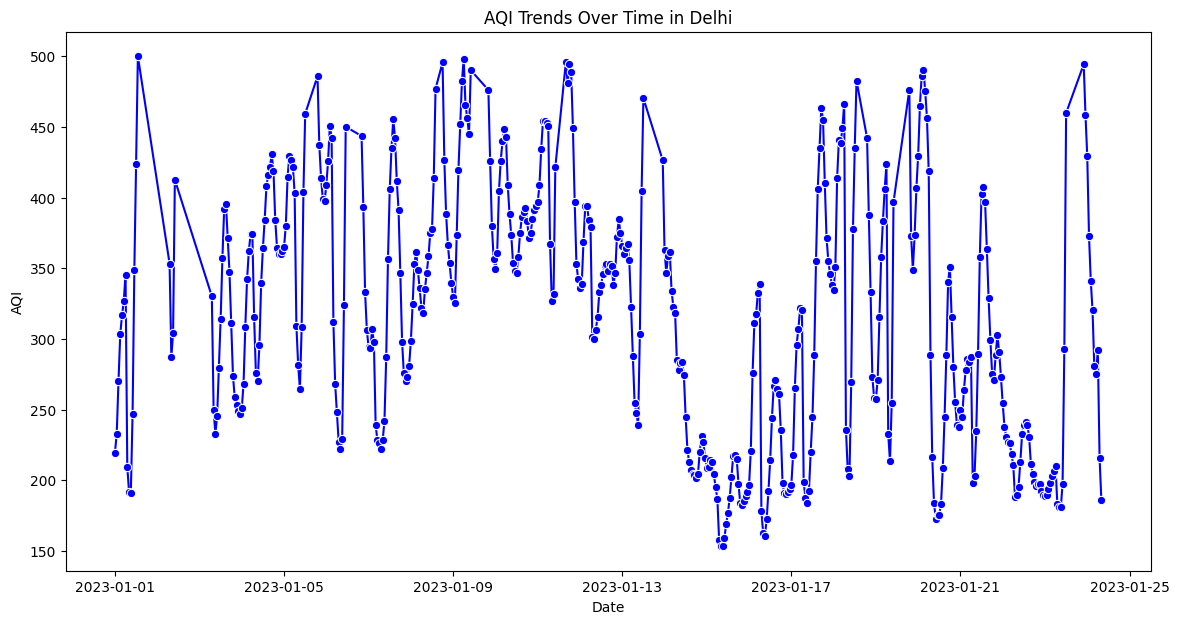

In [48]:
# Time series plot for AQI
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='AQI', data=df, marker='o', color='blue')
plt.title('AQI Trends Over Time in Delhi')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

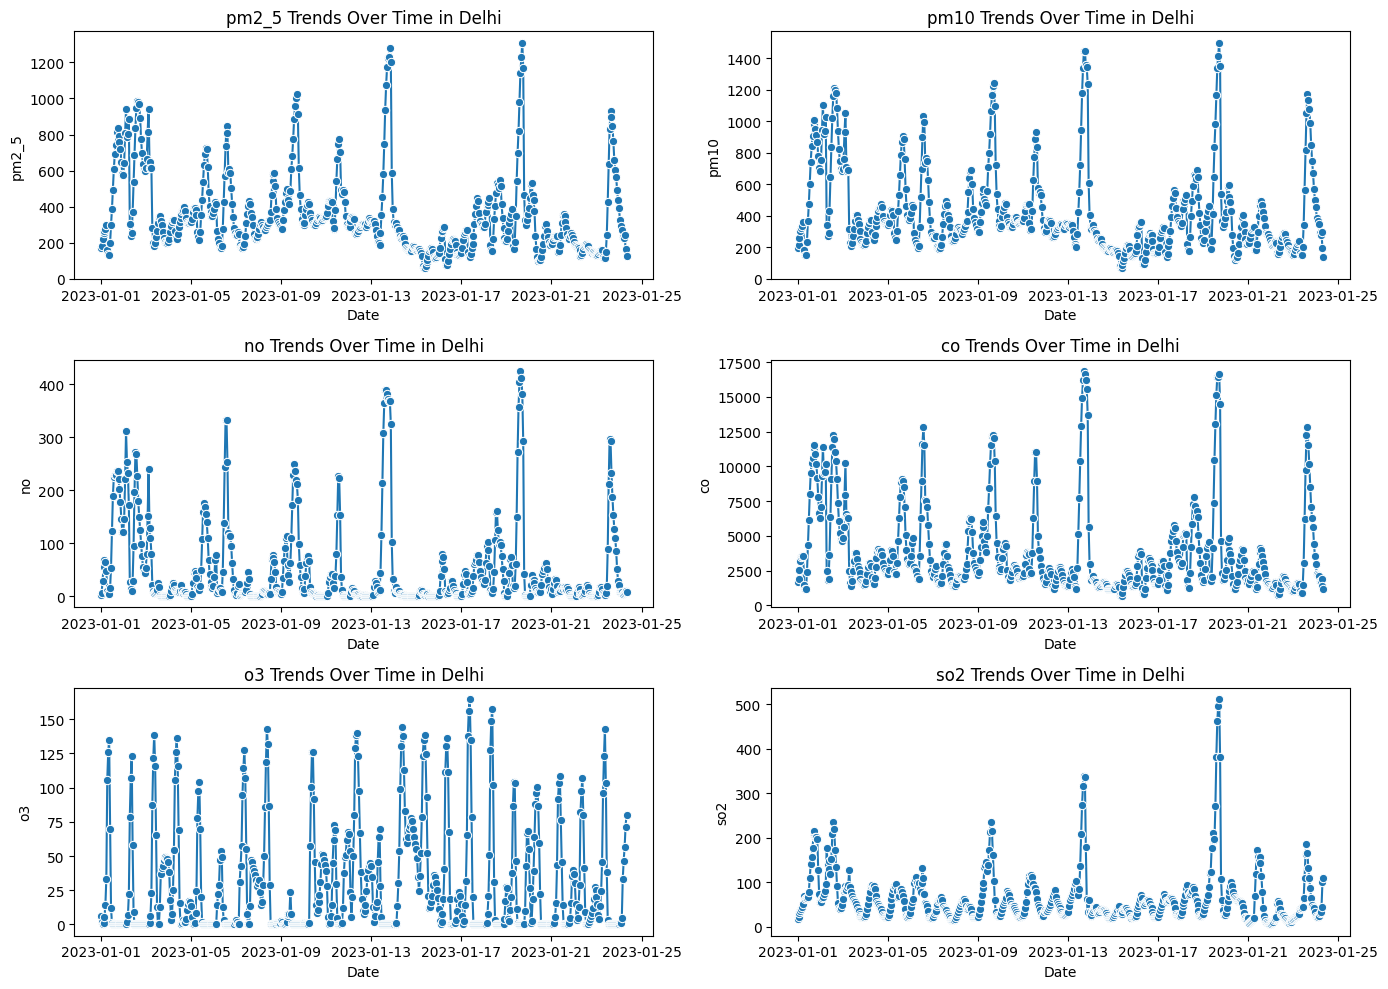

In [49]:
# Time series plots for key pollutants
plt.figure(figsize=(14, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(x='date', y=pollutant, data=df, marker='o')
    plt.title(f'{pollutant} Trends Over Time in Delhi')
    plt.xlabel('Date')
    plt.ylabel(pollutant)
plt.tight_layout()
plt.show()


## Question:

### 1. What is the overall distribution of AQI in Delhi?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


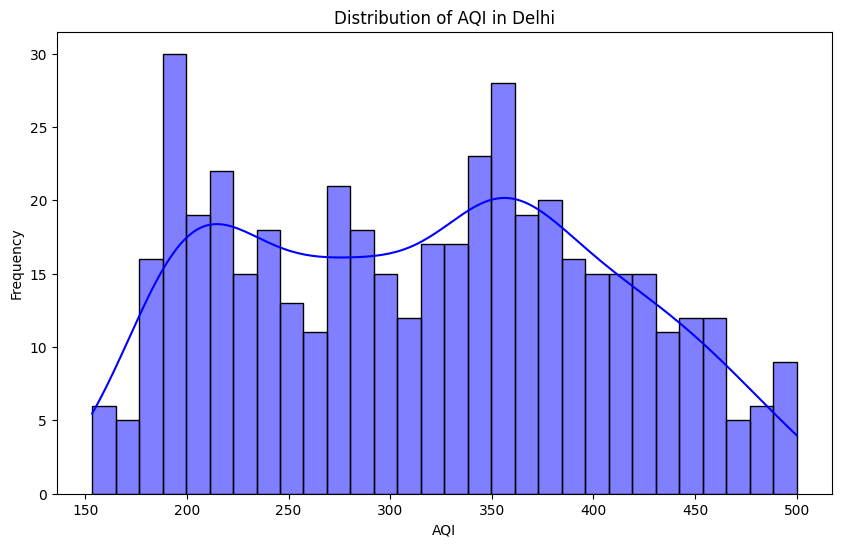

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of AQI in Delhi')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


### 2. What are the average levels of key pollutants (PM2.5, PM10, NO2, CO, O3, SO2) in Delhi?

In [51]:
pollutants_mean = df[pollutants].mean()
pollutants_mean

pm2_5     358.256364
pm10      420.988414
no         51.181979
co       3814.942210
o3         30.141943
so2        64.655936
dtype: float64

### 3. How does AQI vary across different Days?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


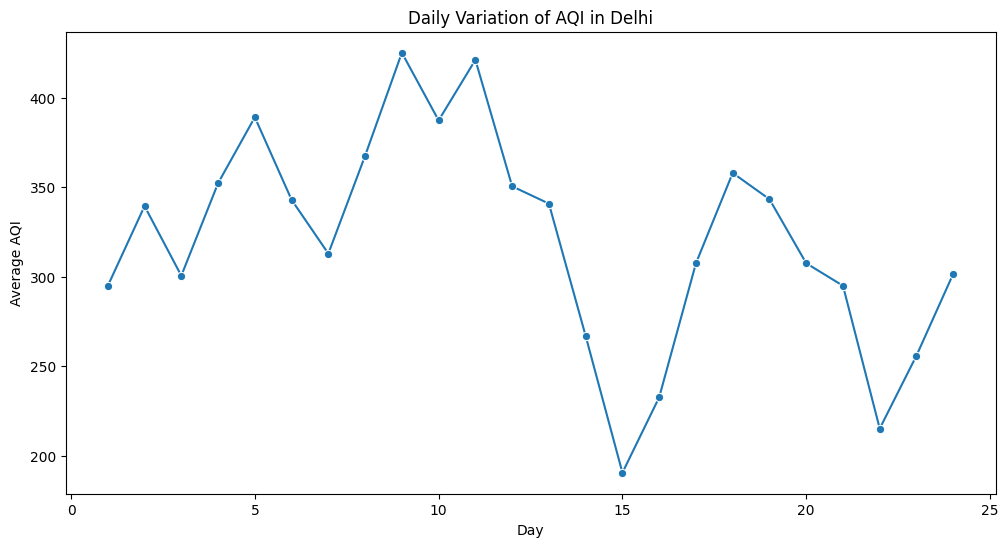

In [52]:
Day_aqi = df.groupby('Day')['AQI'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='AQI', data=Day_aqi, marker='o')
plt.title('Daily Variation of AQI in Delhi')
plt.xlabel('Day')
plt.ylabel('Average AQI')
plt.show()

### 4. What is the correlation between different pollutants and AQI?

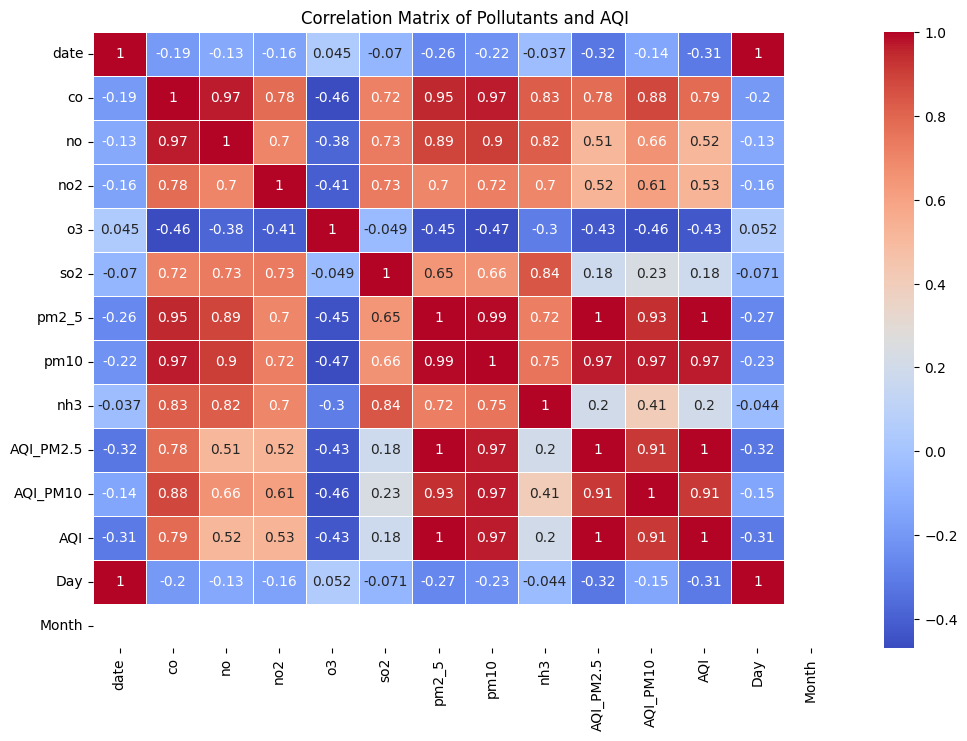

In [53]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Pollutants and AQI')
plt.show()

### 5. How do AQI levels change over time?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


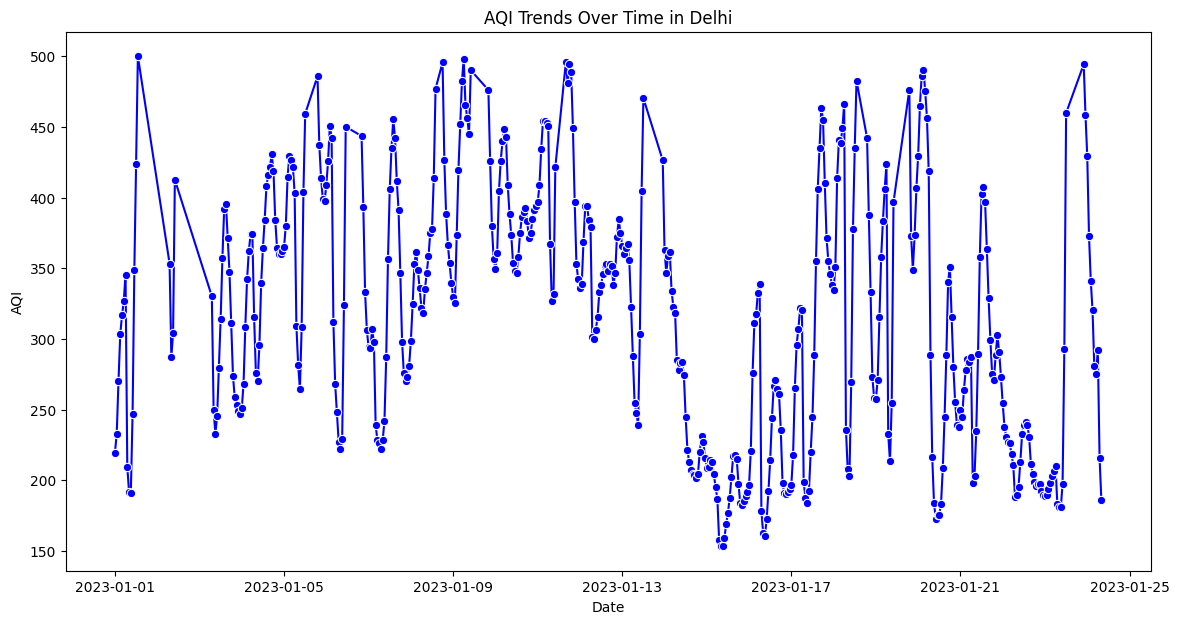

In [54]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='AQI', data=df, marker='o', color='blue')
plt.title('AQI Trends Over Time in Delhi')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

### 6. What is the distribution of AQI categories (Good, Moderate, Unhealthy, etc.)?

AQI
Hazardous                         256
Very Unhealthy                    148
Unhealthy                          57
Good                                0
Moderate                            0
Unhealthy for Sensitive Groups      0
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


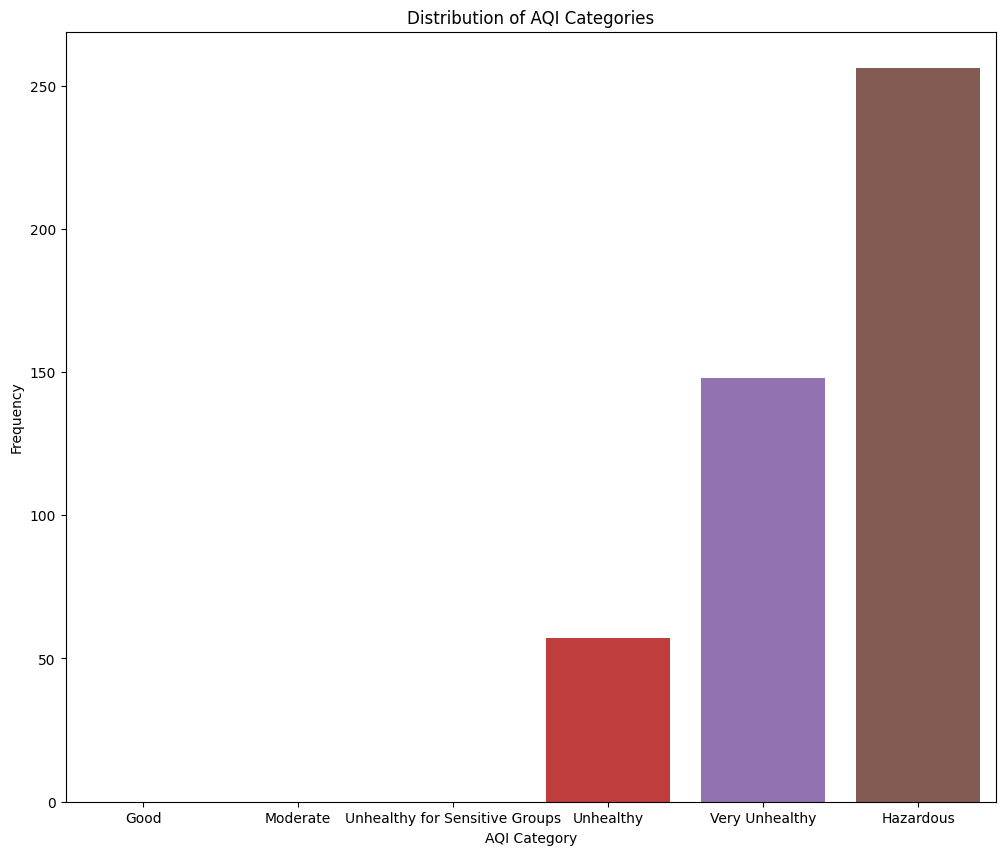

In [55]:
aqi_categories = pd.cut(df['AQI'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])
aqi_category_counts = aqi_categories.value_counts()
print(aqi_category_counts)

plt.figure(figsize=(12, 10))
sns.barplot(x=aqi_category_counts.index, y=aqi_category_counts.values)
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Frequency')
plt.show()

### 7. Which Date has the highest AQI?

In [59]:
highest_aqi_day = df.loc[df['AQI'].idxmax()]
print(f'Day with Highest AQI: {highest_aqi_day["AQI"]}  Date: {highest_aqi_day["date"]}')

Day with Highest AQI: 499.98  date: 2023-01-01 13:00:00


### 8. What is the trend in PM2.5 levels over the years?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


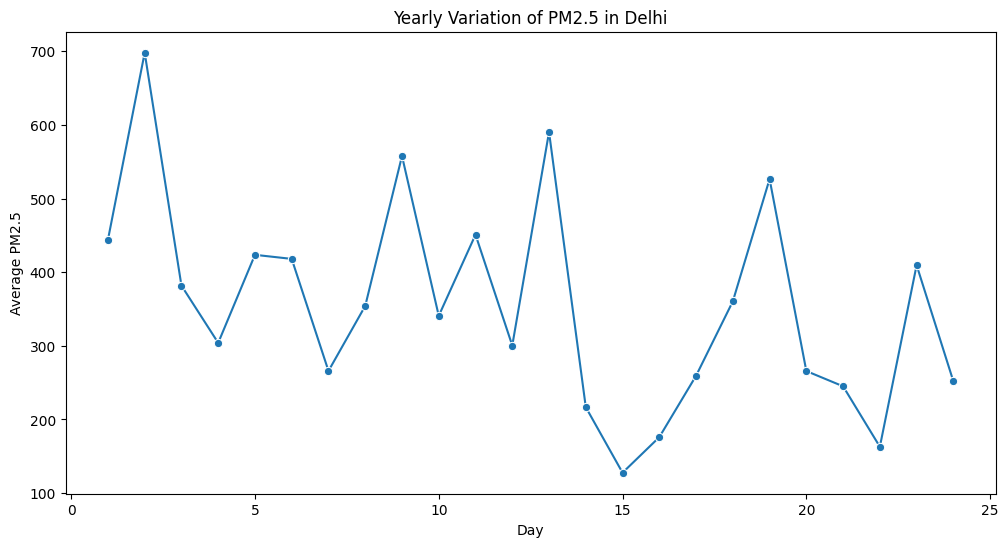

In [69]:
daily_pm25 = df.groupby('Day')['pm2_5'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='pm2_5', data=daily_pm25, marker='o')
plt.title('Yearly Variation of PM2.5 in Delhi')
plt.xlabel('Day')
plt.ylabel('Average PM2.5')
plt.show()

### 9. What is the trend in PM10 levels over the days in January?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


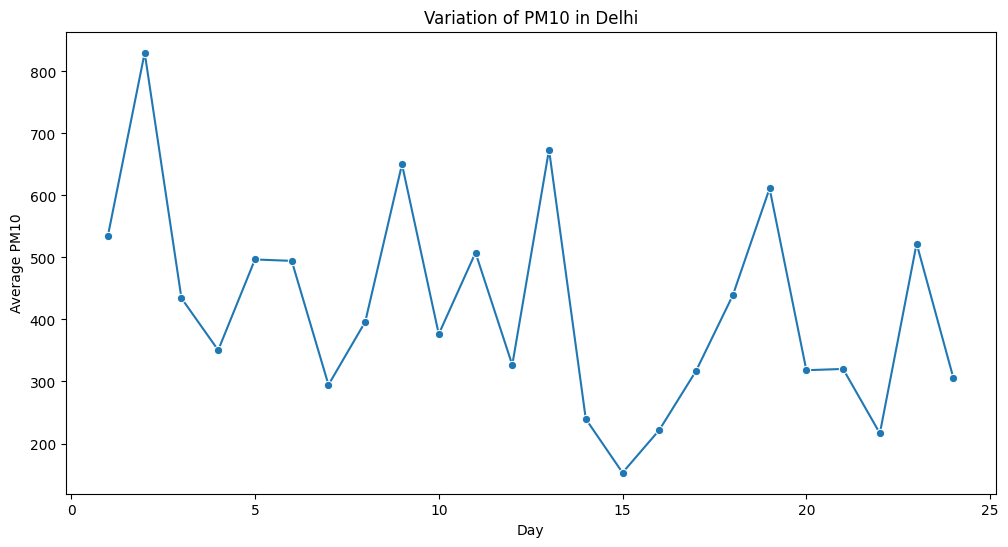

In [68]:
daily_pm10 = df.groupby('Day')['pm10'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='pm10', data=daily_pm10, marker='o')
plt.title('Variation of PM10 in Delhi')
plt.xlabel('Day')
plt.ylabel('Average PM10')
plt.show()

if you see closer the pm2.5 and pm10 are almost same throughout the month. because it is highly correlated.

### 10. How does NO2 vary across different months?


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


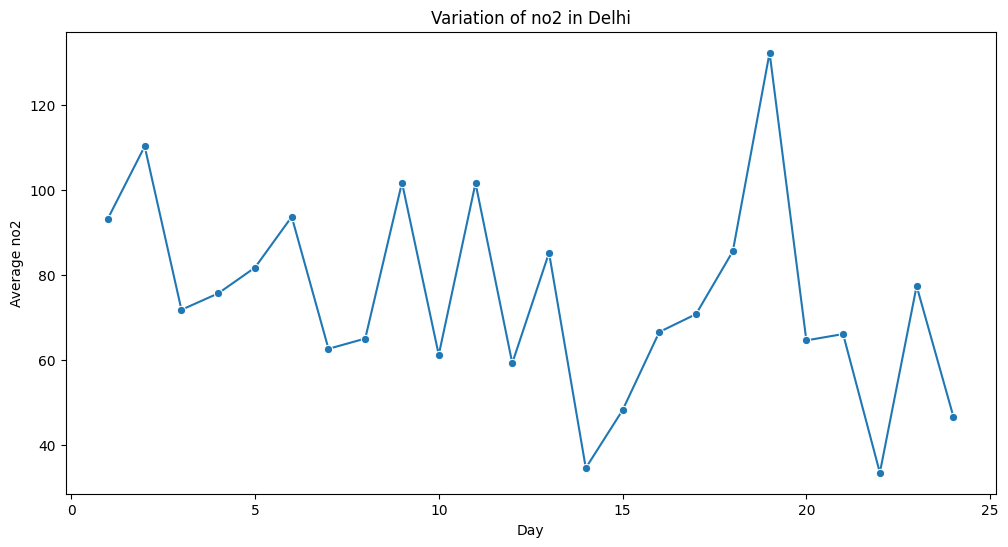

In [70]:
daily_no2 = df.groupby('Day')['no2'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='no2', data=daily_no2, marker='o')
plt.title('Variation of no2 in Delhi')
plt.xlabel('Day')
plt.ylabel('Average no2')
plt.show()

### 11. What is the highest recorded AQI in the dataset?

In [76]:
print('Highest recorded AQI: {}'.format(df['AQI'].max()))

Highest recorded AQI: 499.98


### 12. What are the lowest and highest values for each pollutant?

In [84]:
df[pollutants].agg(['min', 'max'])

,pm2_5,pm10,no,co,o3,so2
min,60.1,69.08,0.00,654.22,0.00,5.25
max,1310.2,1499.27,425.58,16876.22,164.51,511.17


### 13.How does O3 vary within January in delhi?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


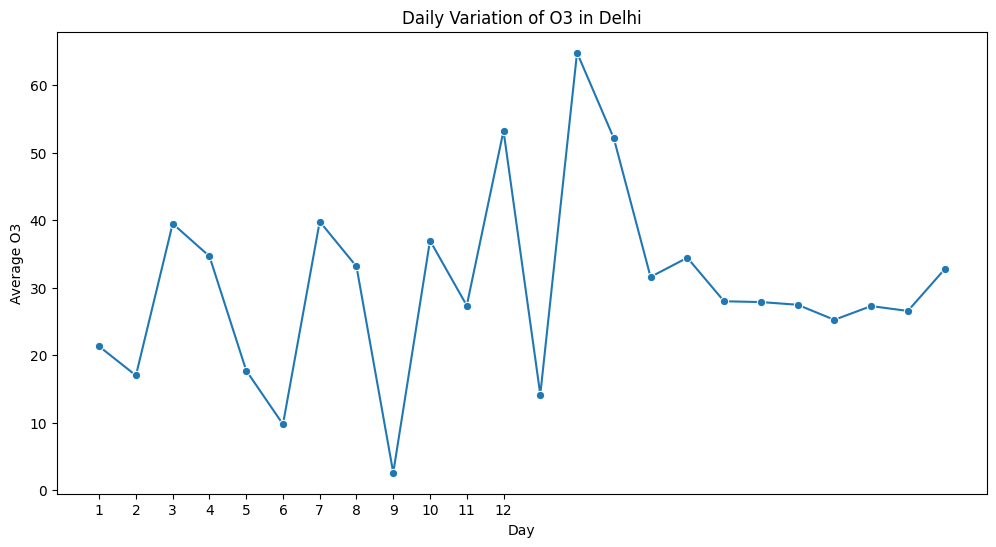

In [87]:
monthly_o3 = df.groupby('Day')['o3'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='o3', data=monthly_o3, marker='o')
plt.title('Daily Variation of O3 in Delhi')
plt.xlabel('Day')
plt.ylabel('Average O3')
plt.xticks(range(1, 13))
plt.show()

### 14. Are there any significant outliers in the AQI data?


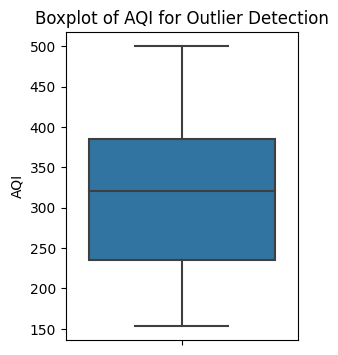

In [96]:
plt.figure(figsize=(3, 4))
sns.boxplot(y=df['AQI'])
plt.title('Boxplot of AQI for Outlier Detection')
plt.show()

In [99]:
df.isnull().sum()

date           0
co             0
no             0
no2            0
o3             0
so2            0
pm2_5          0
pm10           0
nh3            0
AQI_PM2.5    103
AQI_PM10     106
AQI          100
Day            0
Month          0
dtype: int64

### 15. What are the primary factors among pollutants that contribute to high AQI levels in Delhi, based on a multivariate regression model?

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [104]:
df1 = pd.DataFrame(df).dropna()
X = df1[pollutants]
y = df1['AQI']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred = regressor.predict(X_test)
y_pred

array([195.32568158, 355.57113714, 432.27078226, 217.2801759 ,
       422.5658022 , 386.03058101, 248.21183063, 248.76191411,
       274.81979179, 277.49038718, 439.43393294, 379.05408604,
       496.83803598, 214.03663627, 365.56079398, 355.34354355,
       301.79352744, 474.37672428, 288.30320671, 252.10158748,
       424.46706877, 380.73936217, 214.44479223, 322.98163324,
       335.43793615, 359.71021015, 444.42665825, 468.04869412,
       195.45330866, 328.18857873, 242.74542205, 213.92462798,
       243.60917268, 273.91964636, 316.429763  , 402.05264766,
       227.74064841, 433.64957939, 333.43865446, 456.84577779,
       171.54857964, 330.48953865, 225.5978463 , 408.62104338,
       217.56572418, 389.00982701, 465.87004931, 456.19469946,
       223.7560268 , 190.33973398, 190.42157587, 254.80614591,
       216.85880305, 228.17266197, 331.76327538, 289.12495705,
       341.98985184, 322.4603663 , 287.86570492, 292.27165091,
       383.14036119, 227.27003091, 255.13805445, 221.63

In [109]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Coefficients
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

R^2 Score: 0.995830706165369
       Coefficient
pm2_5     0.938227
pm10     -0.035852
no       -0.080458
co        0.001598
o3        0.018024
so2      -0.016554


Mean AQI on weekends: 274.6404619624376
Mean AQI on weekdays: 338.0403660505009


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


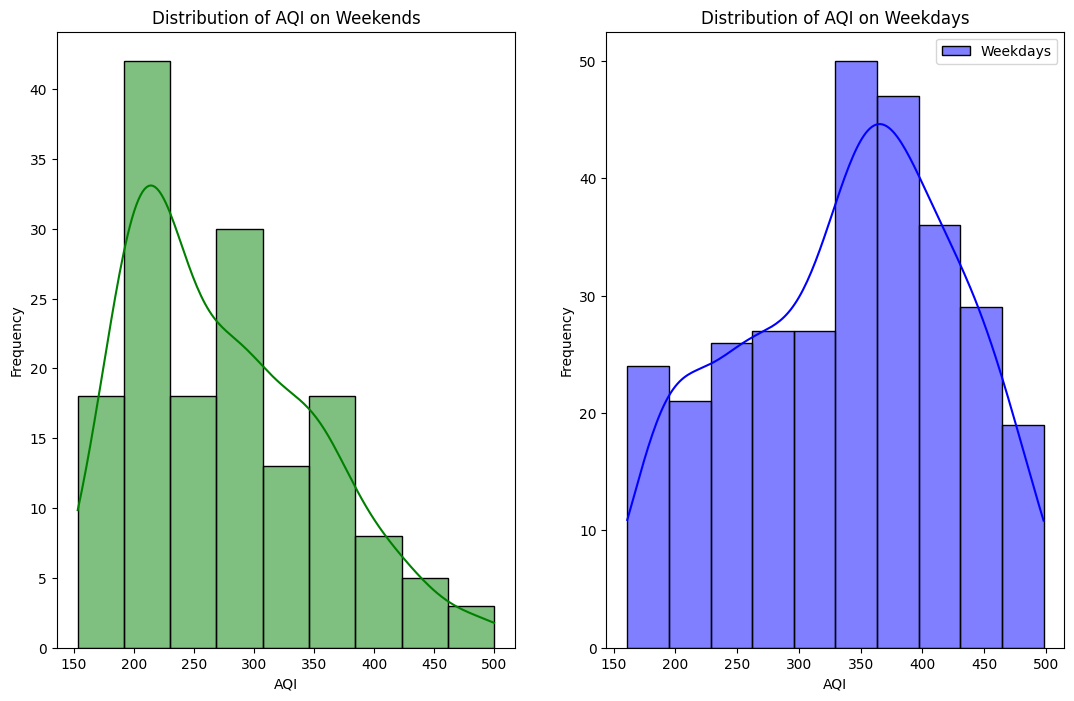

In [123]:
# Create a column for weekdays and weekends
df['DayOfWeek'] = df['date'].dt.dayofweek
df['Weekend'] = df['DayOfWeek'] >= 5

# Compare AQI levels
weekend_aqi = df[df['Weekend'] == True]['AQI']
weekday_aqi = df[df['Weekend'] == False]['AQI']

mean_weekend_aqi = weekend_aqi.mean()
mean_weekday_aqi = weekday_aqi.mean()

print(f'Mean AQI on weekends: {mean_weekend_aqi}')
print(f'Mean AQI on weekdays: {mean_weekday_aqi}')

# Plot
plt.figure(figsize=(13, 8))
plt.subplot(1,2,1)
sns.histplot(weekend_aqi, color='green', label='Weekends', kde=True)
plt.title('Distribution of AQI on Weekends')
plt.xlabel('AQI')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(weekday_aqi, color='blue', label='Weekdays', kde=True)
plt.title('Distribution of AQI on Weekdays')
plt.xlabel('AQI')
plt.ylabel('Frequency')

plt.legend()
plt.show()


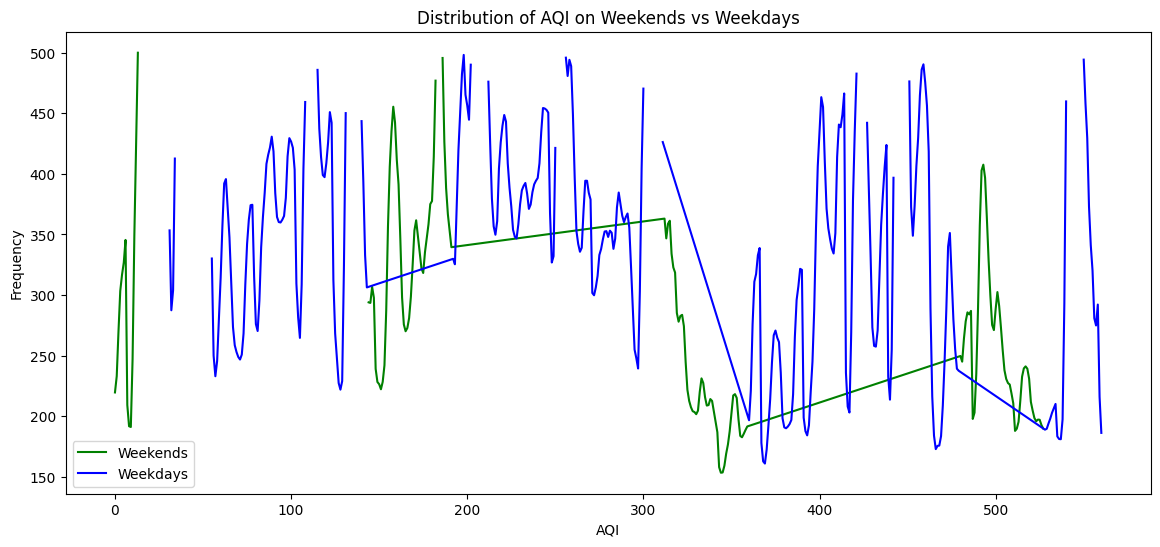

In [133]:
plt.figure(figsize=(14, 6))
weekend_aqi.plot(color='green', label='Weekends')
weekday_aqi.plot(color='blue', label='Weekdays')
plt.title('Distribution of AQI on Weekends vs Weekdays')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.legend()
plt.show()
